In [18]:
import xarray as xa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs

In [9]:
ncfile = '/glade/derecho/scratch/swei/jpss-simcaliop-out/AOD/aod.2019072203.nc'
ds = xa.open_dataset(ncfile)

In [21]:
ds

<xarray.Dataset> Size: 2GB
Dimensions:   (grid_xt: 1536, grid_yt: 768, pfull: 64, nt: 1)
Coordinates:
  * grid_xt   (grid_xt) float64 12kB 0.0 0.2344 0.4688 ... 359.3 359.5 359.8
  * grid_yt   (grid_yt) float64 6kB 89.82 89.59 89.35 ... -89.35 -89.59 -89.82
  * pfull     (pfull) float64 512B 0.3792 0.9639 1.765 ... 985.2 991.6 997.3
Dimensions without coordinates: nt
Data variables: (12/16)
    lon       (grid_yt, grid_xt) float64 9MB ...
    lat       (grid_yt, grid_xt) float64 9MB ...
    aod       (nt, grid_yt, grid_xt) float32 5MB ...
    aod_sulf  (nt, grid_yt, grid_xt) float32 5MB ...
    aod_bc    (nt, grid_yt, grid_xt) float32 5MB ...
    aod_oc    (nt, grid_yt, grid_xt) float32 5MB ...
    ...        ...
    ext_sulf  (nt, pfull, grid_yt, grid_xt) float32 302MB ...
    ext_bc    (nt, pfull, grid_yt, grid_xt) float32 302MB ...
    ext_oc    (nt, pfull, grid_yt, grid_xt) float32 302MB ...
    ext_dust  (nt, pfull, grid_yt, grid_xt) float32 302MB ...
    ext_seas  (nt, pfull, grid_yt, grid_xt) float32 302MB ...
    ext_tot   (nt, pfull, grid_yt, grid_xt) float32 302MB ...

In [28]:
proj = ccrs.PlateCarree()
c_lon = -10.
c_lat = 10.

In [38]:
colors = ["white", "tab:orange", "black"]
n_bins = 100
cmap = LinearSegmentedColormap.from_list('here', colors, N=n_bins)

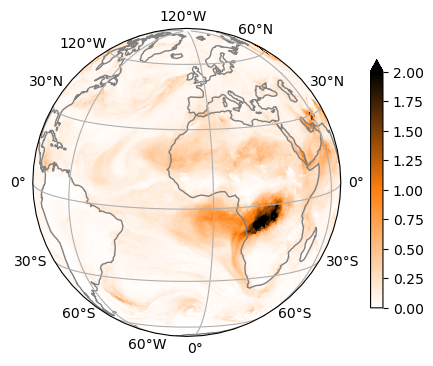

In [39]:
p = ds.aod.sel(nt=0).plot(
    vmin=0,
    vmax=2,
    size=4,
    aspect=1.6,
    add_colorbar=True,
    subplot_kws=dict(
        projection=ccrs.Orthographic(c_lon, c_lat),
    ),
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    cbar_kwargs=dict(
        label=None,
        pad=0.06,
        fraction=0.025,
    ),
)
p.axes.gridlines(draw_labels=True)
p.axes.coastlines(color='grey')